In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
## fixing random for lesson generation
np.random.seed(321)


In [26]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


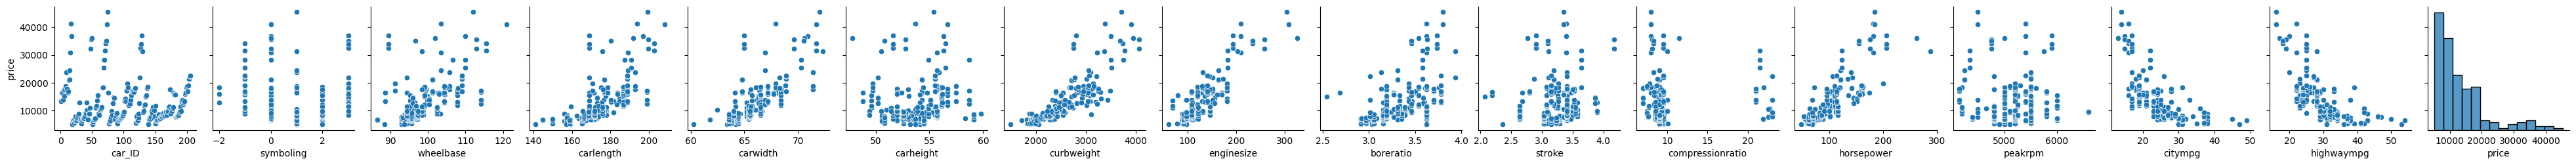

In [27]:
ax = sns.pairplot(df, y_vars='price')

In [28]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [29]:
df['symboling']=df['symboling'].astype('object')

In [31]:
y = df['price'].copy()
X = df.drop(columns=['price', 'car_ID', 'CarName']).copy()
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=42)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
173,-1,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
93,1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
167,2,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


In [7]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols


['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols


['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

In [10]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['symboling', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['wheelbase', 'carlength', 'carwidth',
                                  'carheight', 'curbweight', 'enginesize',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'horsepower', 'peakrpm', 'citympg',
                                  'highwaympg'])])

In [11]:
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,49.7,3139.0,181.0,3.43,3.27,9.0,160.0,5200.0,19.0,25.0
149,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0
150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,54.5,1938.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,52.0,3016.0,171.0,3.27,3.35,9.3,161.0,5200.0,19.0,24.0


In [12]:
## Create the empty list
final_features = []


In [13]:
## Finding the categorical pipeline in our col transformer.
ohe_step = preprocessor.named_transformers_['pipeline-1'][-1]

cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [14]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['symboling_-2',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [15]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['symboling_-2',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm'

In [16]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()


,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
93,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [17]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()



,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
68,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


In [18]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0


,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,1.0


In [19]:
## instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [20]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()


In [21]:
## get model performance metrics
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.94e-56
Time:                        12:30:52   Log-Likelihood:                -1353.5
No. Observations:                 153   AIC:                             2795.
Df Residuals:                     109   BIC:                             2928.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
symboling_-2          -3335.9026   1494.588     -2.232      0.028   -6298.127    -373.678
symboling_-1          -2750.1031    990.223     -2.777      0.006   -4712.694    -787.512
symboling_0            -758.1953    748.424     -1.013      0.313   -2241.547     725.157
symboling_1            -685.6547    818.359     -0.838      0.404   -2307.616     936.306
symboling_2           -1817.9459    855.450     -2.125      0.036   -3513.421    -122.471
symboling_3           -1237.3476    998.652     -1.239      0.218   -3216.643     741.948
fueltype_diesel       -4279.7229   3052.361     -1.402      0.164   -1.03e+04    1769.958
fueltype_gas          -6305.4263   2917.556     -2.161      0.033   -1.21e+04    -522.925
aspiration_std        -6173.5568   1962.392     -3.146      0.002   -1.01e+04   -2284.159
aspiration_turbo      -4411.5924   1840.143     -2.397      0.018   -8058.696    -764.488
doornumber_four       -5148.4051   1933.094     -2.663      0.009   -8979.735   -1317.075
doornumber_two        -5436.7441   1821.194     -2.985      0.003   -9046.291   -1827.198
carbody_convertible     314.3086   1058.537      0.297      0.767   -1783.677    2412.295
carbody_hardtop       -3733.9865   1284.467     -2.907      0.004   -6279.758   -1188.215
carbody_hatchback     -2325.3865    967.269     -2.404      0.018   -4242.482    -408.291
carbody_sedan         -1593.3239    968.170     -1.646      0.103   -3512.206     325.558
carbody_wagon         -3246.7608   1138.294     -2.852      0.005   -5502.823    -990.699
drivewheel_4wd        -3514.9178   1398.767     -2.513      0.013   -6287.228    -742.608
drivewheel_fwd        -3957.5018   1489.367     -2.657      0.009   -6909.378   -1005.626
drivewheel_rwd        -3112.7295   1408.904     -2.209      0.029   -5905.131    -320.328
enginelocation_front  -1.073e+04   2403.236     -4.464      0.000   -1.55e+04   -5965.900
enginelocation_rear     143.8854   2442.719      0.059      0.953   -4697.503    4985.274
enginetype_dohc         457.3787   1199.982      0.381      0.704   -1920.946    2835.704
enginetype_dohcv      -9677.8156   4310.443     -2.245      0.027   -1.82e+04   -1134.658
enginetype_l          -2100.1760   2068.076     -1.016      0.312   -6199.036    1998.684
enginetype_ohc         2707.7955   1236.881      2.189      0.031     256.338    5159.253
enginetype_ohcf         497.9550   1759.258      0.283      0.778   -2988.838    3984.748
enginetype_ohcv       -4444.7994   1244.215     -3.572      0.001   -6910.792   -1978.806
enginetype_rotor       1974.5125   1544.143      1.279      0.204   -1085.929    5034.953
cylindernumber_eight   5824.2369   2096.889      2.778      0.006    1668.271    9980.203
cylindernumber_five   -2947.4001   1874.332     -1.573      0.119   -6662.265     767.465
cylindernumber_four   -

In [22]:
test_preds = result.predict(X_test_df)

In [23]:
print('Testing r2:', r2_score(y_test, test_preds))

Testing r2: 0.8684499938052929
